# Open Data Japan - Public Holidays 1955 - 2022

# Preamble

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
#sns.set(font="YU Gothic UI") # to display Japanese characters

# Load data

In [2]:
path_data = "../data/processed/odj-data-public_holidays.csv"
df = pd.read_csv(path_data, encoding="UTF-8")

df_d = df.copy()
df_d["DATE_OF_PUBLIC_HOLIDAY"] = pd.to_datetime(df_d["DATE_OF_PUBLIC_HOLIDAY"])

# Sample analysis

## Initial understanding of data and data cleansing

### Number of public holidays per year

We will first take a look at the number of public holidays per year in the raw data.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


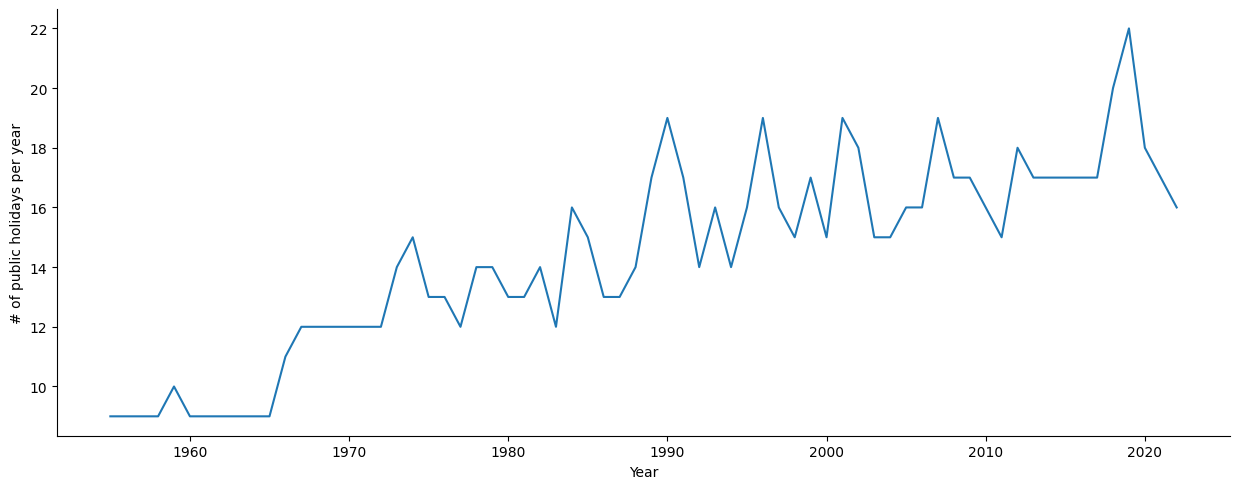

In [3]:
df_01 = pd.DataFrame(df_d.groupby(df_d.DATE_OF_PUBLIC_HOLIDAY.dt.year).count()["NAME_OF_PUBLIC_HOLIDAY_JP"]).reset_index()

ax = sns.relplot(
    data=df_01,
    x="DATE_OF_PUBLIC_HOLIDAY", y="NAME_OF_PUBLIC_HOLIDAY_JP",
    kind="line",
    height=5, aspect=2.5, 
)
ax.set(xlabel='Year', ylabel='# of public holidays per year')

plt.show()

Yearly public holidays have been steadily increasing snice the 1950s - that's great news!   
Naturally we want to know we want to know what these new holidays are.

### Getting a better understanding of what the data means

Let's see what kind of public holidays exist, when they were introduced and how often they occur.

In [4]:
# For each public holiday, find date of first appearance / last appearance / number of occurences and sort by newest
df_d['YEAR'] = df_d.DATE_OF_PUBLIC_HOLIDAY.dt.year

df_s = pd.DataFrame({"First occurence" : df_d.groupby(by='NAME_OF_PUBLIC_HOLIDAY_EN').YEAR.min(), "Last occurence" : df_d.groupby(by='NAME_OF_PUBLIC_HOLIDAY_EN').YEAR.max(), "Number of occurences" : df_d.groupby(by='NAME_OF_PUBLIC_HOLIDAY_EN').YEAR.count()})
df_s.sort_values(by="First occurence", ascending=False)

,First occurence,Last occurence,Number of occurences
NAME_OF_PUBLIC_HOLIDAY_EN,,,
Holiday (National Holiday),2019,2019,2
Mountain Day,2016,2022,7
Shōwa Day,2007,2022,16
Marine Day,1996,2022,27
Enthronement ceremony,1990,1990,1
Funeral service of a Japanese emperor,1989,1989,1
Greenery Day,1989,2022,34
Holiday,1973,2021,104
National Foundation Day,1967,2022,56


We can see that there are about 4 types of national holidays:

1. National holidays that have been in existence since 1955
2. National holidays that were added in 1966/67
3. One-time national holidays related to the imperial family (marriage, change of the Emperor)
4. "Newer" holidays added from time to time after 1989

There is also a category of nondescript "Holidays" that occur with the highest frequency of 104. Taking a look at the site where the original data was published, we see that this data includes substitute national holidays for when a national holiday falls on a Sunday. 

We'll add the above categories to the data and investigate what exactly the generic "Holiday" category is.

In [15]:
categories = {'Holiday (National Holiday)':'Unknown',
'Mountain Day':'Newer holiday',
'Shōwa Day':'Newer holiday',
'Marine Day':'Newer holiday',
'Enthronement ceremony':'Special event',
'Funeral service of a Japanese emperor':'Special event',
'Greenery Day':'Newer holiday',
'Holiday':'Unknown',
'National Foundation Day':'60s holiday',
'Respect-for-the-Aged Day':'60s holiday',
'Health and Sports Day':'60s holiday',
'Imperial marriage ceremony':'Special event',
"New Year's day":'50s holiday',
'Autumnal Equinox Day':'50s holiday',
'Labour Thanksgiving Day':'50s holiday',
"Children's Day":'50s holiday',
"Emperor's Birthday":'50s holiday',
'Culture Day':'50s holiday',
'Constitution Memorial Day':'50s holiday',
'Coming of Age Day':'50s holiday',
'Vernal Equinox Day':'50s holiday'}

# Add day of week information, 0=Monday
df_d['DOW'] = df_d['DATE_OF_PUBLIC_HOLIDAY'].dt.dayofweek
# Add category
df_d['HOLIDAY_CATEGORY'] = df_d['NAME_OF_PUBLIC_HOLIDAY_EN'].map(categories)

array([[<Axes: title={'center': '50s holiday'}>,
        <Axes: title={'center': '60s holiday'}>],
       [<Axes: title={'center': 'Newer holiday'}>,
        <Axes: title={'center': 'Special event'}>],
       [<Axes: title={'center': 'Unknown'}>, <Axes: >]], dtype=object)

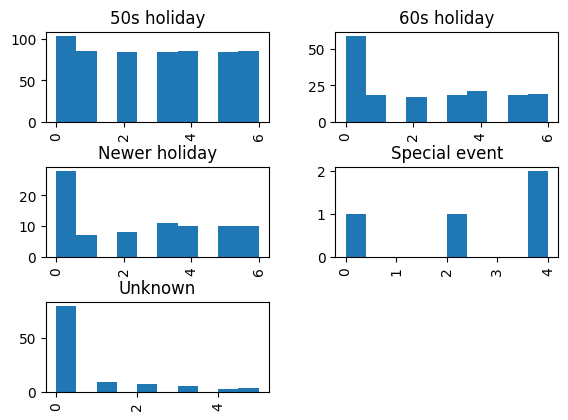

In [16]:
# Let's also check what weekday 'Unknown' fall onto
df_d.hist('DOW', by='HOLIDAY_CATEGORY')

In [23]:
# We see that in most cases it is a Monday - a replacement for a Sunday public holiday
# Let's compare public holidays on Sunday and Monday in each year - the number on Monday should be
# equal or greater than the number on Sunday if our replacement day theory is correct
df_s2 = pd.DataFrame({'Mondays' : df_d.query('DOW == 0').groupby(by='YEAR').DOW.count(), 'Sundays' : df_d.query('DOW == 6').groupby(by='YEAR').DOW.count()})
df_s2.fillna(0).query('Sundays > Mondays')

,Mondays,Sundays
YEAR,,
1956,0.0,4.0
1960,0.0,1.0
1961,0.0,2.0
1963,1.0,2.0
1967,0.0,3.0
1971,1.0,2.0


We see that after 1971, we get the expected relationships between the number of public holidays on Mondays and Sundays. A quick google search reveals that the Japanese law was amended in https://ja.wikipedia.org/wiki/%E6%8C%AF%E6%9B%BF%E4%BC%91%E6%97%A5